In [1]:
# Actions to Perform:

# 1. Use pandas to read data as a dataframe.
# 2. Check the data. There should be no missing values.
# 3. Convert the diagnosis column to 1/0 and store in a new column target.
# 4. Store the encoded column in dataframe and drop the diagnosis column for simplicity.
# 5. Scale the data so that each feature has a single unit variance.
# 6. Transform this data to its first 2 principal components.
# 7. Plot the two dimensions.
# 8. Print the explained variance.
# 9. Try the same with 3 principal components.
# 10. Check the accuracy for 2nd and 3rd components.

In [32]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Use pandas to read data as a dataframe.
df = pd.read_csv('breast-cancer-data.csv')
df.shape

(569, 32)

In [3]:
# 2. Check the data. There should be no missing values.
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [4]:
# 3. Convert the diagnosis column to 1/0 and store in a new column target.
df['diagnosis'].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [5]:
df.diagnosis.replace('M', '0', inplace = True)
df.diagnosis.replace('B', '1', inplace = True)
df.diagnosis.values

# store in a new column target
target = df.diagnosis
target.shape

(569,)

In [19]:
# 4. Store the encoded column in dataframe and drop the diagnosis column for simplicity.
df.drop('diagnosis', axis = 1, inplace = True)

In [20]:
# 5. Scale the data so that each feature has a single unit variance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

# scale the data
scaled_df = scaler.transform(df)
print(scaled_df)
print(df.head())

[[-0.23640517  1.09706398 -2.07333501 ...  2.29607613  2.75062224
   1.93701461]
 [-0.23640344  1.82982061 -0.35363241 ...  1.0870843  -0.24388967
   0.28118999]
 [ 0.43174109  1.57988811  0.45618695 ...  1.95500035  1.152255
   0.20139121]
 ...
 [-0.23572747  0.70228425  2.0455738  ...  0.41406869 -1.10454895
  -0.31840916]
 [-0.23572517  1.83834103  2.33645719 ...  2.28998549  1.91908301
   2.21963528]
 [-0.24240586 -1.80840125  1.22179204 ... -1.74506282 -0.04813821
  -0.75120669]]
         id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840

In [9]:
# 6. Transform this data to its first 2 principal components.
# use PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # for 2 principal components

pca.fit(scaled_df)

scaled_df_pca = pca.transform(scaled_df)
scaled_df_pca.shape

(569, 2)

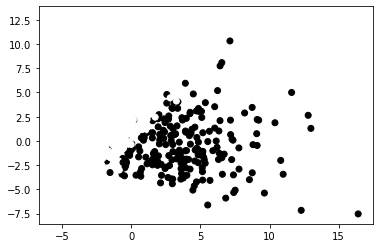

In [11]:
# 7. Plot the two dimensions.
plt.scatter(scaled_df_pca[:, 0], scaled_df_pca[:, 1], c = target, cmap = 'viridis')

In [15]:
# 8. Print the explained variance.
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[13.94854707  5.74139697]
[0.43512603 0.17910333]


In [22]:
# 9. Try the same with 3 principal components.

pca3 = PCA(n_components=3)
pca3.fit(scaled_df)

scaled_df_pca3 = pca3.transform(scaled_df)
scaled_df_pca3.shape

(569, 3)

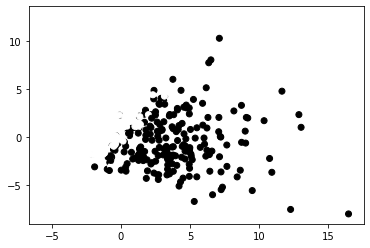

In [23]:
# plot again
plt.scatter(scaled_df_pca3[:, 0], scaled_df_pca3[:, 1], c = target, cmap = 'viridis')

In [24]:
# print explained varience again
print(pca3.explained_variance_)
print(pca3.explained_variance_ratio_)

[13.31145188  5.70683496  2.84038694]
[0.42864701 0.18376792 0.09146436]


In [28]:
# 10. Check the accuracy for 2nd and 3rd components
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state=10)

In [34]:
# PCA 2 comp
# scale data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

pca.fit(x_train)
x_train_pca2 = pca.transform(x_train)
print(x_train_pca2.shape)

x_test_pca2 = pca.transform(x_test)
print(x_test_pca2.shape)

(455, 2)
(114, 2)


In [37]:
# init model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

/home/mypc/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# predict
# y_pred2 = model.predict(x_test_pca2)

model.score(x_test_pca2, y_test)

# # accuracy
# accuracy_score(y_test, y_pred2)
# y_pred2

ValueError: X has 2 features per sample; expecting 31

In [ ]:
# PCA 3 comp
x_train = scaler.transform(x_train)
x_test = scaler.tranform(x_test)

x_